
**Ejercicio 1**- Escribir el sistema de ecuaciones anterior en forma matricial como $\mathbf{A}$ $\vec{x}$ = $\vec{b}$, definiendo cuál
es la matriz A, cuáles son los vectores x y b, y las dimensiones de cada uno.


La Matriz $\mathbf{A}$ la formamos así:

$$ 
\begin{bmatrix} 
X_{0}^n & X_{0}^{n-1} & \dots & X_{0} & 1  \\
X_{1}^n & X_{1}^{n-1} & \dots & X_{1} & 1  \\
\vdots & \vdots & \ddots & \ddots & \vdots \\
\vdots & \vdots & \ddots & \ddots & \vdots \\
X_{n}^n & X_{n}^{n-1} & \dots & X_{n} & 1  \\
\end{bmatrix}
$$ 

Siendo $\mathbf{A}$ de $\mathcal{NxN}$.

El vector $\vec{x}$ la formamos así:

$$ 
\begin{bmatrix}
a_{n} \\
a_{n-1}  \\
\vdots  \\
a_{1}  \\
a_{0}  \\
\end{bmatrix} 
$$

Siendo $\vec{x}$ de $\mathcal{Nx1}$.

El vector $\vec{b}$ la formamos así:

$$
\begin{bmatrix}
f(X_{0}) \\
f(X_{1})  \\
\vdots  \\
f(X_{n-1})  \\
f(X_{n})  \\
\end{bmatrix}
$$

Siendo $\vec{b}$ de $\mathcal{Nx1}$.

**Ejercicio 2** - Construir un np.ndarray que contenga 8 nodos equiespaciados entre −1 y 1 y resolver
el sistema lineal del ejercicio 1, obteniendo así los coeficientes del polinomio buscado. Implementar una
función que reciba un parámetro $\mathcal{x}$ de tipo float y devuelva $p(x)$, el valor del polinomio en ese punto.

In [1]:
import numpy as np 
import funciones

nodos = np.linspace(-1,1,8)
matrizA = np.vander(nodos)
vectorB = (1/(1+(25*(nodos**2))))
vectorX = np.linalg.solve(matrizA,vectorB)
vectorBest = np.matmul(matrizA,vectorX)

#Ejemplo:

funciones.ejercicio2(1, vectorX)


0.038461538461538325

Lo primero que realizamos es crear un vector de 8 elementos entre -1 y 1 con misma distancia entre sí. Luego, con la ayuda de np.vender() creamos una matriz Vandermonde (la que se mostró en el ejercicio 1) y creamos el vectorB con los valores de $f(x)$ del array nodos. Para finalizar, gracias a np.linalg.solve() resolvemos $\mathbf{A}$ $\vec{x}$ = $\vec{b}$ y obtenemos el vector $\vec{x}$ que posee los coeficientes de nuestro polinomio $\mathcal{p}$. Al final del ejercicio incluí un ejemplo de como funciona ejercicio2() (que la importe de funciones.py). El funcionamiento es simple, recibe como parámetros a y vectorX (siendo a el valor de $f(a)$ que queremos estimar y vectorX un array con los coeficientes del polinomio $\mathcal{p}$ que se calcularon antes) y realiza un array con las potencias de a (desde 0 hasta 8) y luego realiza multiplicación punto con el vectorX para así realizar $p(a)$ y obtener nuestra estimación.

**Ejercicio 3** - En una misma figura, graficar dentro del intervalo $\mathcal{I}$:
El gráfico de la función $f(x)$ y el gráfico del polinomio $\mathcal{p}$ hallado.
Los valores de $f(x)$ en cada uno de los nodos usados para interpolar, visualizados como puntos.
¿Cómo es la aproximación de $\mathcal{p}$ a $f(x)$ en cada uno de los nodos? ¿Y fuera de los nodos?


[0.038461538461538325, 0.10789110596665452, 0.1578239864024198, 0.19118750243521632, 0.21065955467854902, 0.21868052292445128, 0.2174649141571967, 0.20901275734934366, 0.19512074504006804, 0.17739312169581734, 0.15725231885327773, 0.13594933704464207, 0.11457387450519496, 0.09406420266320792, 0.07521678841214197, 0.05869566316516339, 0.04504153869196914, 0.03468066973792183, 0.027933463425493077, 0.025022835438026636, 0.026082312985798328, 0.03116388455439756, 0.040245596435412256, 0.053238896039428996, 0.06999572199133963, 0.09031534100796179, 0.1139509315579672, 0.14061591430412135, 0.16999002932783402, 0.2017251601360196, 0.23545090445026828, 0.27077989177832673, 0.3073128477678899, 0.3446434053427041, 0.38236266262097923, 0.4200634876161105, 0.4573445697197137, 0.49381421796696806, 0.5290939060842704, 0.5628215643192002, 0.5946546180527936, 0.6242727731941309, 0.6513805483572299, 0.6757095538202548, 0.6970205172670304, 0.7151050563108712, 0.7297871978007175, 0.7409246439095847, 0.7

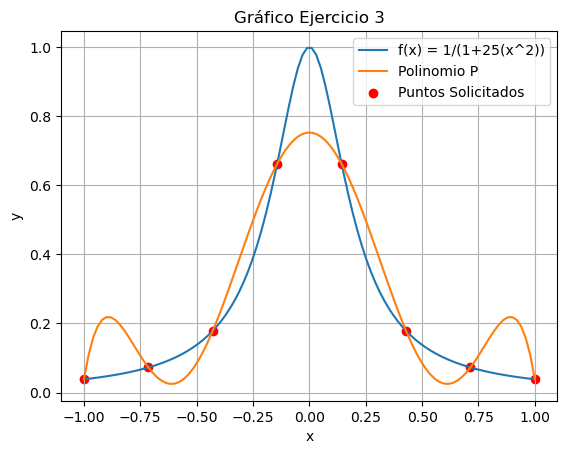

In [2]:
import matplotlib.pyplot as plt

temp = np.linspace(-1,1,100)
vectorBest = []
for i in temp:
    vectorBest.append(funciones.ejercicio2(i,vectorX))
print(vectorBest)
graphfx = funciones.funcion(temp)
plt.plot(temp, graphfx, label='f(x) = 1/(1+25(x^2))')
plt.plot(temp, vectorBest, label='Polinomio P')
plt.scatter(nodos, funciones.funcion(nodos), color='red', label='Puntos Solicitados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico Ejercicio 3')
plt.legend()
plt.grid(True)
plt.show()



Para plotear simplemente cree un vector para ir calculando para valor de $p(x)$ y realizar el gráfico conjunto con el de $f(x)$. Podemos observar que el polinomio aproxima perfectamente para los valores de $\mathcal{x}$ que estaban en el nodo que utlizamos para crear la Matriz $\mathbf{A}$. Para valores entre los nodos la aproximación no es perfecta, ya que a veces aproxima por debajo y otros por arriba de la curva de $f(x)$.

**Ejercicio 4** - Implementar una función para cuantificar la aproximación de $p(x)$ a $f(x)$ a partir de la siguiente
fórmula de distancia o error
$error(x)$ = | $f(x)$ − $p(x)$ | 
Usar esta función para evaluar el error de aproximación de $p(x)$ a $f(x)$, de la siguiente manera:
-Construir un nuevo vector con 100 puntos equiespaciados dentro del intervalo I (no confundir éstos
con los nodos en los que interpolamos antes!).
-Evaluar la función de error en cada uno de los puntos y reportar el promedio y el máximo de estos
100 errores calculados.


In [3]:
import math

#Ejemplo

print(funciones.error(1,vectorX))
vecerror = []
for i in temp:
    vecerror.append(funciones.error(i,vectorX))
errormedio = np.mean(vecerror)
errormax = np.max(vecerror)
print(errormedio,errormax)

0
0.08459142237385306 0.24528527039305015


En el ejercicio 4 realizamos una funcion llamada error que devuelve el error entre la funcion $f(x)$ y el polinomio $\mathcal{p}$ en un punto especifico. Toma como parámetros el valor del punto que queremos evaluar y un vectorX que debe ser el vector de coeficiente que hayamos calculado. También cabe destacar que decidí devolver 0 evaluando mat.isclose() para que cuando evalue dos puntos que dan iguales, devuelva error 0 y no un valor muy pequeño (que representa 0). En este caso, como lo mencionamos en el ejercicio 3, los errores en los puntos del nodo que obtuvimos el vectorX, el error es 0. Por el resto, tenemos un error medio de 0.08459142237385306 y un error máximo de 0.24528527039305015.

**Ejercicio 5** - Recrear la figura del ejercicio 3 pero esta vez graficando tanto a $f(x)$ como a $p(x)$ a lo largo del
intervalo [−1,2, 1,2]. ¿Cómo es la aproximación por fuera del intervalo original $\mathcal{I}$?


[-2.523543635267668, -1.9525360296726433, -1.4728550683762194, -1.0741708913498567, -0.7469315113529635, -0.4823272770463962, -0.2722560922098136, -0.10928939106306501, 0.013361130308485514, 0.10187602642464277, 0.16185985877712028, 0.19837219609227574, 0.21595785848991156, 0.2186764055380781, 0.21013086820393134, 0.19349572470059861, 0.17154412023009247, 0.14667433062224333, 0.12093546986966919, 0.09605244155876802, 0.0734501341967535, 0.05427686043470992, 0.03942704018667875, 0.02956312764478186, 0.025136782190365636, 0.02640928320118774, 0.03347118875462152, 0.046261238226899204, 0.06458449878838302, 0.08812975579486593, 0.11648614707490323, 0.14915904111317535, 0.18558515912988027, 0.22514694105615507, 0.26718615540553137, 0.3110167530414173, 0.355936964840612, 0.4012406432528502, 0.446227847756377, 0.49021467420955206, 0.5325423280984868, 0.5725854416807084, 0.6097596350248576, 0.6435283209464149, 0.6734087538394562, 0.6989773224044423, 0.7198740862720359, 0.7358065565229484, 0.74

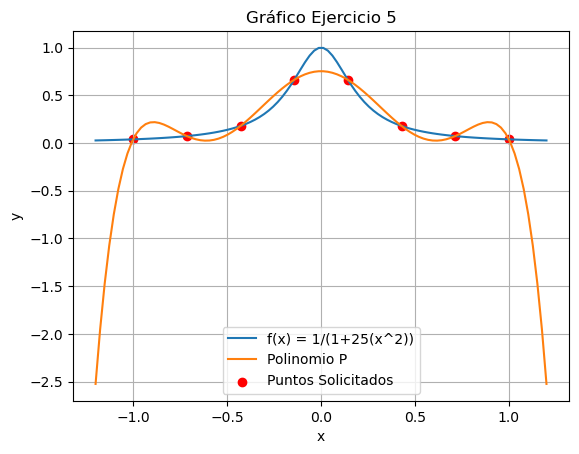

In [4]:
temp = np.linspace(-1.2,1.2,100)
def funcion(x):
    return (1/(1+(25*(x**2))))
vectorBest = []
for i in temp:
    vectorBest.append(funciones.ejercicio2(i,vectorX))
print(vectorBest)
graphfx = funciones.funcion(temp)
plt.plot(temp, graphfx, label='f(x) = 1/(1+25(x^2))')
plt.plot(temp, vectorBest, label='Polinomio P')
plt.scatter(nodos, funcion(nodos), color='red', label='Puntos Solicitados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico Ejercicio 5')
plt.legend()
plt.grid(True)
plt.show()


Para realizar este ejercicio, solo variamos el vector temp y vemos como aproxima en los valores que antes no estaban. Como vemos gráficamente, aproxima de manera erronea dando valores muy lejanos (con error máximo de más de 2). Una explicación que puede tener esto es que no "entrenamos" al polinomio que aproxima con esos valores, así que a la hora de aproximar $\mathcal{p}$, no se tomaban en cuenta.

**Ejercicio 6** - Repetir los ejercicios 2, 3 y 4 esta vez tomando 16 nodos. ¿Cómo cambia el comportamiento
de $\mathcal{p}$ y su aproximación a $f(x)$? El error de aproximación medido en el ejercicio 4, ¿mejoró o empeoró?

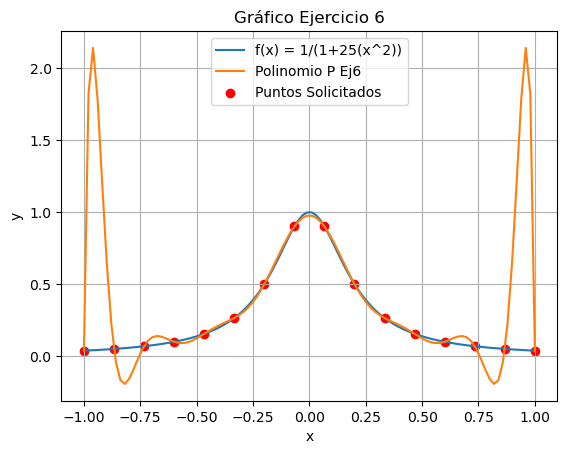

0
0.1830639005750479 2.0967229089902975


In [6]:
nodosej6 = np.linspace(-1,1,16)
matrizAej6 = np.vander(nodosej6)
vectorBej6 = (1/(1+(25*(nodosej6**2))))
vectorXej6 = np.linalg.solve(matrizAej6, vectorBej6)
vectorBestej6 = np.matmul(matrizAej6,vectorXej6)
#Ejemplo:
funciones.ejercicio6(1,vectorXej6)

#------------------------------------------------------------

tempej6 = np.linspace(-1,1,100)
vectorBestej6 = []
for i in tempej6:
    vectorBestej6.append(funciones.ejercicio6(i,vectorXej6))
graphfxej6 = funciones.funcion(tempej6)
plt.plot(tempej6, graphfxej6, label='f(x) = 1/(1+25(x^2))')
plt.plot(tempej6, vectorBestej6, label='Polinomio P Ej6')
plt.scatter(nodosej6, funciones.funcion(nodosej6), color='red', label='Puntos Solicitados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico Ejercicio 6')
plt.legend()
plt.grid(True)
plt.show()

#-------------------------------------------

#Ejemplo
print(funciones.errorej6(1,vectorXej6))
vecerrorej6 = []
for i in tempej6:
    vecerrorej6.append(funciones.errorej6(i,vectorXej6))
errormedioej6 = np.mean(vecerrorej6)
errormaxej6 = np.max(vecerrorej6)
print(errormedioej6,errormaxej6)


Repetimos los ejercicios 2,3 y 4 variando un poco las funciones (presentes en el archivo funciones.py) para que se adapten y puedan tomar valores de vectores de 16 entradas (el funcionamiento es el mismo). Luego, gráficamente, observamos que en **casi** todos los puntos aproxima de muy buena manera. El polinomio solo esta aproximando *mucho* peor en los valores entre -1 y -0.75, y 0.75 y 1. En estos valores la aproximación pasa a tomar valores *muy* superiores a los de $f(x)$, haciendo así que nuestro error máximo y medio suban de gran manera. De igual manera, los puntos sobre los 16 nodos los aproxima perfectamente (teniendo un error de 0). Una idea (quizás un tanto remota, pero me dió sensaciones de similtud) es al overfiting a la hora de trabajar con algoritmos de machine learning.

**Ejercicio 7** - Puede demostrarse que la interpolación es óptima si la distribución de los nodos en un
dado intervalo se corresponde con las raíces de una familia de polinomios conocidos como Polinomios
de Chebyshev. A continuación queremos verificar que el error cometido en la interpolación se minimiza
utilizando éstos nodos.
- Repetir el ejercicio 6, utilizando ocho nodos de Chebyshev y comparar los errores obtenidos con el
caso de ocho nodos equiespaciados.


[0.02339460443883734, 0.04062619678139434, 0.05227460530257755, 0.05936474056919394, 0.06282710756606091, 0.06350241958728153, 0.062146113959625104, 0.059432769597992596, 0.05596042639300158, 0.05225480643065916, 0.048773437044138834, 0.0459096756976618, 0.04399663670246956, 0.04331101976490648, 0.044076840366599424, 0.04646906197673584, 0.05061713009644486, 0.05660840813527912, 0.06449151511979534, 0.07427956523423629, 0.08595330919331512, 0.09946417744709568, 0.1147372252179788, 0.13167397936978564, 0.1501551871089417, 0.17004346651776348, 0.1911858589198433, 0.2134162830775368, 0.23655789122154858, 0.26042532691262077, 0.28482688473532114, 0.3095665718239307, 0.3344460712204335, 0.3592666070646066, 0.3838307116162098, 0.40794389410927645, 0.43141621143850506, 0.45406374067775057, 0.47570995343061817, 0.4961869920131541, 0.5153368474686407, 0.5330124394144902, 0.5490785977212388, 0.5634129460236422, 0.5759066870638713, 0.5864652898668079, 0.5950090787474421, 0.6014737241503691, 0.605

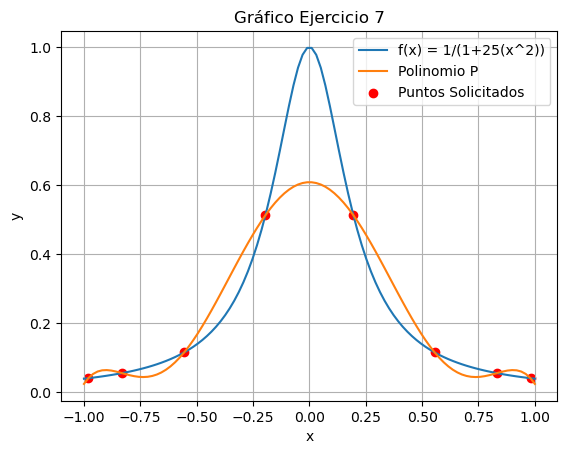

0.015066934022701123
0.07003444598051783 0.3894684748855268


In [13]:
nodoscheby = np.sort(np.array([0.9807852804032304 , 0.8314696123025452 , 0.5555702330196023 ,0.19509032201612833 , -0.1950903220161282 , -0.555570233019602 ,-0.8314696123025453 , -0.9807852804032304]))
matrizA = np.vander(nodoscheby)
vectorB = (1/(1+(25*(nodoscheby**2))))
vectorX = np.linalg.solve(matrizA,vectorB)
vectorBest = np.matmul(matrizA,vectorX)

#----------------------------------------------------------------------

#Ejemplo:
funciones.ejercicio2(1, vectorX)
temp = np.linspace(-1,1,100)
vectorBest = []
for i in temp:
    vectorBest.append(funciones.ejercicio2(i,vectorX))
print(vectorBest)
graphfx = funciones.funcion(temp)
plt.plot(temp, graphfx, label='f(x) = 1/(1+25(x^2))')
plt.plot(temp, vectorBest, label='Polinomio P')
plt.scatter(nodoscheby, funciones.funcion(nodoscheby), color='red', label='Puntos Solicitados')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gráfico Ejercicio 7')
plt.legend()
plt.grid(True)
plt.show()

#-----------------------------------------------------------------------

#Ejemplo
print(funciones.error(1,vectorX))
vecerror = []
for i in temp:
    vecerror.append(funciones.error(i,vectorX))
errormedio = np.mean(vecerror)
errormax = np.max(vecerror)
print(errormedio,errormax)


Para cerrar, en este ejercicio se utilizaron las mismas funciones y metodologías que los ejercicios pasados. Podemos observar un aumento en el error máximo comparado con el de los nodos equiespaciados, pero un error medio menor (de 0.24528527039305015 a 0.3894684748855268 y de 0.08459142237385306 a 0.07003444598051783 respectivamente). Gráficamente observo que el error máximo aumenta ya que la aproximación en 0 se "achata" (entiendo que para que el error en los otros nodos baje) y se aleja más del valor de $f(0)$. Investigando un poco, vimos que esto es porque los nodos de Chebyshev minimizan el error medio de una interpolación (en un intervalo) de manera uniforme.